<h2> Problem 1 </h2>

In [1]:
import re
import networkx as nx
G=nx.Graph()
filepath = "collab_data.txt"
with open(filepath) as fp:
    line = fp.readline()
    while line:
        m = re.search('\d\d\d\d\s+E?\d*[a-zA-Z]?\s+\w+\s+(.+?),', line)
        if m:
            found = m.group(1)
            found_list = [x.strip() for x in re.split('&|\*',found)]
            found_list = [re.sub('\ \([a-zA-Z][a-zA-Z][a-zA-Z]?.\)', '', w) for w in found_list] 
            found_list = [item for item in found_list if 'review of' not in item ]
            list1 = [y for x in found_list for y in x.split(' and ') if re.match(r"^(den )?[A-Z][a-z]+\b and \b[A-Z][a-z]+$", x)]
            list2 = [x for x in found_list if not re.match(r"^(den )?[A-Z][a-z]+\b and \b[A-Z][a-z]+$", x)]
            found_list = list1 + list2
            if len(found_list) == 1:
                G.add_node(found_list[0])
            elif len(found_list) > 1:
                for i in range(0,len(found_list)-1):
                    for j in range(i+1,len(found_list)):
                        G.add_edge(found_list[i],found_list[j]) 
        line = fp.readline()

<h3>Number of nodes</h3>

In [2]:
len(G.nodes())

35033

<h3> Number of edges</h3>

In [3]:
len(G.edges())

111825

<h3> Number of edges (not including self-loops) </h3>

In [4]:
len(G.edges()) -  G.number_of_selfloops()

111434

<h3>Number of self-loops</h3>

In [5]:
G.number_of_selfloops()

391

<h3> Node degrees </h3>

In [6]:
import collections
def count_degrees(G):
    node_degrees = []
    for i in G.nodes():
        node_degrees.append(G.degree[i])
    node_degrees.sort()
    counter=collections.Counter(node_degrees)
    return counter
counter = count_degrees(G)
print(counter)

Counter({1: 7182, 2: 6212, 3: 4270, 0: 4203, 4: 2560, 5: 1818, 6: 1259, 7: 1010, 8: 782, 9: 571, 10: 520, 11: 486, 12: 345, 13: 319, 14: 257, 15: 249, 17: 208, 16: 193, 18: 163, 19: 147, 21: 134, 20: 130, 23: 112, 22: 102, 24: 99, 26: 97, 25: 76, 31: 75, 28: 64, 27: 62, 32: 60, 29: 57, 30: 56, 34: 48, 37: 46, 35: 43, 36: 43, 33: 40, 38: 36, 42: 33, 49: 33, 39: 32, 40: 30, 41: 30, 44: 26, 45: 25, 43: 24, 46: 24, 47: 22, 48: 18, 50: 18, 51: 18, 56: 16, 59: 16, 61: 16, 65: 16, 67: 15, 60: 14, 63: 14, 64: 14, 52: 13, 53: 13, 54: 13, 55: 13, 58: 13, 74: 13, 73: 11, 75: 11, 57: 10, 66: 10, 72: 10, 79: 10, 68: 9, 62: 8, 71: 8, 77: 8, 80: 8, 82: 8, 87: 8, 99: 8, 69: 7, 85: 6, 86: 6, 89: 6, 103: 6, 70: 5, 81: 5, 90: 5, 94: 5, 98: 5, 125: 5, 78: 4, 84: 4, 91: 4, 95: 4, 97: 4, 107: 4, 76: 3, 83: 3, 92: 3, 93: 3, 96: 3, 100: 3, 101: 3, 104: 3, 108: 3, 110: 3, 114: 3, 117: 3, 119: 3, 122: 3, 133: 3, 150: 3, 162: 3, 88: 2, 102: 2, 106: 2, 109: 2, 112: 2, 116: 2, 120: 2, 123: 2, 127: 2, 129: 2, 134: 

In [7]:
import numpy as np
def convert_to_log_log(dict_name):
    a, b = dict_name.keys(), dict_name.values()
    a_list = list(a)
    b_list = list(b)
    a_log = []
    b_log = []
    for i in range(0,len(a_list)):
        if np.log(a_list[i]) > 0 and np.log(b_list[i]) > 0:
            a_log.append(np.log(a_list[i]))
            b_log.append(np.log(b_list[i]))
    return a_log, b_log

In [8]:
a_log,b_log = convert_to_log_log(counter)

/Users/gigisonnenschein/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


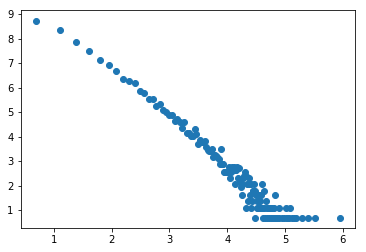

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(a_log,b_log)

<h3> Connected components </h3>

In [10]:
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)

28011

In [11]:
num_con_comp = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
counter_comp=collections.Counter(num_con_comp)
print(counter_comp)

Counter({1: 4226, 2: 868, 3: 191, 4: 58, 5: 22, 6: 14, 7: 5, 8: 2, 28011: 1, 10: 1})


In [12]:
a_comp_log,b_comp_log = convert_to_log_log(counter_comp)

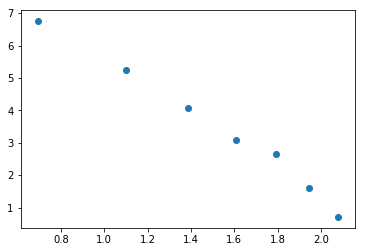

In [13]:
plt.scatter(a_comp_log,b_comp_log)

<h3> Node-to-Node distances </h3>

In [14]:
con_comp = [c for c in sorted(nx.connected_components(G), key=len, reverse=True)]
largest_con_comp = con_comp[0]

In [15]:
def find_max_distance(G, node_name, nodes_list):
    max_dist = 0
    for i in nodes_list:
        dist = nx.shortest_path_length(G, source=node_name, target=i, weight=None)
        if max_dist < dist:
            max_dist = dist
    return max_dist

In [16]:
find_max_distance(G, "Hartmanis", largest_con_comp)

9

In [17]:
find_max_distance(G, "Bornberg-Bauer", largest_con_comp)

13

<h3> Own Analysis </h3>

In [18]:
def find_nodes_degree_over(G, lower_bound):
    node_list = []
    for i in G.nodes():
        if G.degree[i] > lower_bound:
            node_list.append(i)
    return node_list
node_list = find_nodes_degree_over(G, 600)
print(node_list)

['Wang', 'Chen', 'Lee']


In [19]:
def convert_dict_keyiterator_to_set(dict_var):
    new_list = []
    for i in dict_var:
        new_list.append(i)
    return set(new_list)
neighbors1 = convert_dict_keyiterator_to_set(G.neighbors(node_list[0]))
neighbors2 = convert_dict_keyiterator_to_set(G.neighbors(node_list[1]))
neighbors3 = convert_dict_keyiterator_to_set(G.neighbors(node_list[2]))

In [20]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

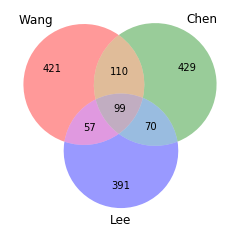

In [21]:
venn3(subsets = (neighbors1,neighbors2,neighbors3), set_labels = (node_list[0], node_list[1],node_list[2]))
plt.show()

<h2> Problem 2 </h2>

<h3> Random Network</h3>

In [22]:
import random as rd
def generate_u_v(upper_bound):
    u = rd.randrange(upper_bound)
    v = rd.randrange(upper_bound)
    while u == v:
        u = rd.randrange(upper_bound)
        v = rd.randrange(upper_bound)
    return u,v

def generate_random_network(n, m, self_loops):
    G =nx.Graph()
    for i in range(0,n):
        G.add_node(i)
    for i in range(0,m - self_loops):
        u,v = generate_u_v(n)
        while G.has_edge(u,v):
            u,v = generate_u_v(n)
        G.add_edge(u,v)
    for i in range(0, self_loops):
        u = rd.randrange(n)
        while G.has_edge(u,u):
            u = rd.randrange(n)
        G.add_edge(u,u)
    return G

Expected number of self-loops

In [23]:
from scipy.special import comb
n = len(G.nodes())
m = len(G.edges())
total_possible_edges = comb(n + 1, 2)
p = m / total_possible_edges
self_loops = int(np.floor(p * n))
print(self_loops)

6


In [24]:
G_rand = generate_random_network(len(G.nodes), len(G.edges), self_loops)

<h3> Small-world network</h3>

In [25]:
def generate_small_world(n):
    G =nx.Graph()
    for i in range(0,n):
        G.add_node(i)
    for i in range(0,n):
        if i != n-1 and i != n-2:
            G.add_edge(i, i+1)
            G.add_edge(i, i+2)
        elif i == n-2:
            G.add_edge(i, i+1)
            G.add_edge(i, 0)
        elif i == n-1:
            G.add_edge(i, 1)
            G.add_edge(i, 0)
    return G   

In [26]:
G_small = generate_small_world(len(G.nodes()))

Randomly select m - 2n pairs of nodes and add an edge between them

In [27]:
for i in range(0,len(G.edges()) - 2*len(G_small.nodes)):
    u,v = generate_u_v(len(G_small.nodes))
    while G_small.has_edge(u,v):
        u,v = generate_u_v(len(G_small.nodes))
    G_small.add_edge(u,v)

<h3> Degree distribution </h3>

/Users/gigisonnenschein/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


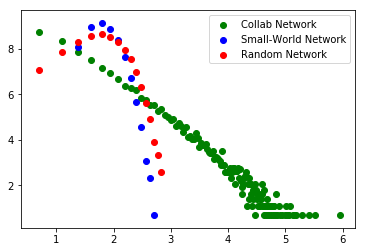

In [28]:
a_log_small,b_log_small = convert_to_log_log(count_degrees(G_small))
a_log_rand,b_log_rand = convert_to_log_log(count_degrees(G_rand))
plt.scatter(a_log,b_log,color='g',label="Collab Network")
plt.scatter(a_log_small,b_log_small,color='b',label="Small-World Network")
plt.scatter(a_log_rand,b_log_rand,color='r',label="Random Network")
plt.legend()

<h3> Connected components </h3>

Random Network

In [29]:
largest_cc_rand = max(nx.connected_components(G_rand), key=len)
len(largest_cc_rand)

34969

Small-World Network

In [30]:
largest_cc_small = max(nx.connected_components(G_small), key=len)
len(largest_cc_small)

35033

<h3> Node-to-Node distances </h3>

In [31]:
con_comp_rand = [c for c in sorted(nx.connected_components(G_rand), key=len, reverse=True)]
largest_con_comp_rand = con_comp_rand[0]
find_max_distance(G_rand, 33, largest_con_comp_rand)

9

In [32]:
con_comp_small = [c for c in sorted(nx.connected_components(G_small), key=len, reverse=True)]
largest_con_comp_small = con_comp_small[0]
find_max_distance(G_small, 33, largest_con_comp_small)

9

<h3> Own Analysis </h3>

In [33]:
print(count_degrees(G_small))

Counter({6: 9198, 5: 7738, 7: 7165, 8: 4364, 4: 3251, 9: 2069, 10: 829, 11: 290, 12: 94, 13: 22, 14: 10, 15: 2, 16: 1})


In [34]:
print(count_degrees(G_rand))

Counter({6: 5706, 5: 5285, 7: 4950, 4: 4075, 8: 4033, 9: 2818, 3: 2585, 10: 1880, 2: 1182, 11: 1060, 12: 554, 1: 344, 13: 270, 14: 134, 0: 64, 15: 50, 16: 28, 17: 13, 18: 1, 19: 1})


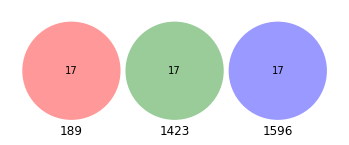

In [36]:
node_list_rand = find_nodes_degree_over(G_rand, 16)
neighbors_rand1 = convert_dict_keyiterator_to_set(G_rand.neighbors(node_list_rand[0]))
neighbors_rand2 = convert_dict_keyiterator_to_set(G_rand.neighbors(node_list_rand[1]))
neighbors_rand3 = convert_dict_keyiterator_to_set(G_rand.neighbors(node_list_rand[2]))
venn3(subsets = (neighbors_rand1,neighbors_rand2,neighbors_rand3), set_labels = (node_list_rand[0], node_list_rand[1],node_list_rand[2]))
plt.show()

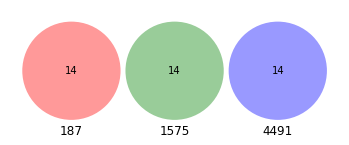

In [37]:
node_list_small = find_nodes_degree_over(G_small, 13)
neighbors_small1 = convert_dict_keyiterator_to_set(G_small.neighbors(node_list_small[0]))
neighbors_small2 = convert_dict_keyiterator_to_set(G_small.neighbors(node_list_small[1]))
neighbors_small3 = convert_dict_keyiterator_to_set(G_small.neighbors(node_list_small[2]))
venn3(subsets = (neighbors_small1,neighbors_small2,neighbors_small3), set_labels = (node_list_small[0], node_list_small[1],node_list_small[2]))
plt.show()